# Chapter 5 Classifiers


# Import Training&Test Data after Data Preprocessing

All csv files imported here shall be shuffled, thus shall be the same with shuffled one displayed in Data Preprocessing (in datasplit_train_test.ipynb file). Data shall be the same version with backup stored in file chp5_classifiers.

In [2]:
import pandas as pd
import numpy as np

In [4]:
# Read in csv file of training and testing record
train_df = pd.read_csv("./output/classification/version_0/train_set.csv")
test_df = pd.read_csv("./output/classification/version_0/test_set.csv") 

test_wtpopl = pd.read_csv("./output/classification/version_0/test_set_with_popularity.csv") 

In [5]:
# Display first 5 rows of training dataframe, check whether the same with shuffled one displayed in Data Preprocessing file
train_df.head()

,language,cast_0,director,genre_0,company_0,country,cast_num,crew_num,popularity
0,0,202,13,5,31,0,0,1,1.0
1,0,371,1212,13,584,6,0,0,0.0
2,26,1690,1956,5,1051,9,0,0,0.0
3,0,32,135,6,344,0,0,3,1.0
4,0,518,1793,8,942,0,0,1,0.0


In [6]:
# Extract label class popularity from training set
labl_df = train_df['popularity']
labl_df.head()

0    1.0
1    0.0
2    0.0
3    1.0
4    0.0
Name: popularity, dtype: float64

In [7]:
# Remove label class from training set
train_set = train_df.drop(columns=['popularity'])
train_set.head()

,language,cast_0,director,genre_0,company_0,country,cast_num,crew_num
0,0,202,13,5,31,0,0,1
1,0,371,1212,13,584,6,0,0
2,26,1690,1956,5,1051,9,0,0
3,0,32,135,6,344,0,0,3
4,0,518,1793,8,942,0,0,1


In [8]:
# Display first 5 rows of test dataframe, check whether the same with shuffled one displayed before
test_df.head()

,language,cast_0,director,genre_0,company_0,country,cast_num,crew_num
0,0,65,186,4,13,7,1,2
1,0,1617,1869,5,618,0,0,1
2,0,78,983,6,451,0,1,3
3,0,64,153,0,18,0,2,1
4,0,1713,1980,16,1070,0,0,0


In [9]:
# Transfer type of ddtaframe to numpy array for training and test sets and label set
train_ary = np.array(train_set)
print(train_ary[0:5])
test_ary = np.array(test_df)
print(test_ary[0:5])
labl_ary = np.array(labl_df)
print(labl_ary[0:5])

[[   0  202   13    5   31    0    0    1]
 [   0  371 1212   13  584    6    0    0]
 [  26 1690 1956    5 1051    9    0    0]
 [   0   32  135    6  344    0    0    3]
 [   0  518 1793    8  942    0    0    1]]
[[   0   65  186    4   13    7    1    2]
 [   0 1617 1869    5  618    0    0    1]
 [   0   78  983    6  451    0    1    3]
 [   0   64  153    0   18    0    2    1]
 [   0 1713 1980   16 1070    0    0    0]]
[1. 0. 0. 1. 0.]


# Classification

So far, all data array required shall be organized in suitable format and correctly imported.

Training Features: train_ary

Training Labels: labl_ary

Testing Features: test_ary

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
from sklearn.naive_bayes import GaussianNB

In [12]:
from sklearn.svm import NuSVC

In [13]:
from sklearn.neural_network import MLPClassifier

In [14]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

In [15]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

In [16]:
# Array of movies consists of features selected as input
X = train_ary

In [17]:
# Popularity label of sample data 0-unpopular 1-popular
y = labl_ary

# sklearn.neighbors.KNeighborsClassifier¶

In [18]:
neigh = KNeighborsClassifier(n_neighbors=7)
neigh.fit(X, y) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='uniform')

In [19]:
# To predict popularity using test set's features
KNpredct_ary = neigh.predict(test_ary)

In [20]:
print(KNpredct_ary)

[1. 0. 1. ... 1. 1. 0.]


In [21]:
# Transfer the array of predicted popularity of test data into dataframe
KNpredct_df = pd.DataFrame(data=KNpredct_ary, columns=['popularity'])
KNpredct_df.head(10)

,popularity
0,1.0
1,0.0
2,1.0
3,1.0
4,0.0
5,0.0
6,1.0
7,1.0
8,1.0
9,0.0


In [22]:
KNprob_each = neigh.predict_proba(test_ary)
KNprob_each

array([[0.14285714, 0.85714286],
       [1.        , 0.        ],
       [0.28571429, 0.71428571],
       ...,
       [0.42857143, 0.57142857],
       [0.28571429, 0.71428571],
       [0.71428571, 0.28571429]])

In [23]:
pos_prob = []
for inner in KNprob_each:
    pos_prob.append(inner[1])
pos_prob[0:10]

[0.8571428571428571,
 0.0,
 0.7142857142857143,
 1.0,
 0.0,
 0.2857142857142857,
 0.8571428571428571,
 0.8571428571428571,
 1.0,
 0.42857142857142855]

In [27]:
# Insert result into test_wtpopl, check the prediction correctness
test_wtpopl.insert(9, 'KNeigh', KNpredct_df['popularity'])

In [28]:
test_wtpopl.head()

,language,cast_0,director,genre_0,company_0,country,cast_num,crew_num,popularity,KNeigh
0,0,65,186,4,13,7,1,2,1.0,1.0
1,0,1617,1869,5,618,0,0,1,0.0,0.0
2,0,78,983,6,451,0,1,3,1.0,1.0
3,0,64,153,0,18,0,2,1,1.0,1.0
4,0,1713,1980,16,1070,0,0,0,0.0,0.0


# sklearn.naive_bayes.GaussianNB

In [40]:
gaus = GaussianNB()
gaus.fit(X, y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [41]:
# To predict popularity using test set's features
NBpredct_ary = gaus.predict(test_ary)

In [42]:
print(NBpredct_ary)

[1. 0. 1. ... 1. 1. 1.]


In [43]:
# Transfer the array of predicted popularity of test data into dataframe
NBpredct_df = pd.DataFrame(data=NBpredct_ary, columns=['popularity'])
NBpredct_df.head(10)

,popularity
0,1.0
1,0.0
2,1.0
3,1.0
4,0.0
5,1.0
6,1.0
7,1.0
8,1.0
9,1.0


In [44]:
GNBprob_each = gaus.predict_proba(test_ary)
GNBprob_each

array([[3.01216788e-03, 9.96987832e-01],
       [9.99907533e-01, 9.24672042e-05],
       [1.44513162e-02, 9.85548684e-01],
       ...,
       [3.51782518e-01, 6.48217482e-01],
       [8.78066556e-02, 9.12193344e-01],
       [1.29331556e-01, 8.70668444e-01]])

In [45]:
pos_prob = []
for inner in GNBprob_each:
    pos_prob.append(inner[1])
pos_prob[0:10]

[0.996987832120718,
 9.246720424528215e-05,
 0.9855486837694368,
 0.9999662624174607,
 4.067222076858368e-08,
 0.6199433493142222,
 0.8499572205728656,
 0.9986651933933354,
 0.9999999987918002,
 0.5154953603930624]

In [46]:
# Insert result into test_wtpopl, check the prediction correctness
test_wtpopl.insert(10, 'NBGaus', NBpredct_df['popularity'])

In [47]:
test_wtpopl.head()

,language,cast_0,director,genre_0,company_0,country,cast_num,crew_num,popularity,KNeigh,NBGaus
0,0,65,186,4,13,7,1,2,1.0,1.0,1.0
1,0,1617,1869,5,618,0,0,1,0.0,0.0,0.0
2,0,78,983,6,451,0,1,3,1.0,1.0,1.0
3,0,64,153,0,18,0,2,1,1.0,1.0,1.0
4,0,1713,1980,16,1070,0,0,0,0.0,0.0,0.0


In [48]:
# naive_bayes.GaussianNB classifier using partial fit (weight)
gaus_pf = GaussianNB()
gaus_pf.partial_fit(X, y, np.unique(y))

GaussianNB(priors=None, var_smoothing=1e-09)

In [49]:
# To predict popularity using test set's features, partial fit (weight)
NBpredct_pf_ary = gaus_pf.predict(test_ary)

In [50]:
print(NBpredct_pf_ary)

[1. 0. 1. ... 1. 1. 1.]


In [51]:
# Transfer the array of predicted popularity of test data into dataframe
NBpredct_pf_df = pd.DataFrame(data=NBpredct_ary, columns=['popularity'])
NBpredct_pf_df.head(10)

,popularity
0,1.0
1,0.0
2,1.0
3,1.0
4,0.0
5,1.0
6,1.0
7,1.0
8,1.0
9,1.0


In [52]:
# Insert result into test_wtpopl, check the prediction correctness
test_wtpopl.insert(11, 'NBGaus_pf', NBpredct_pf_df['popularity'])

In [53]:
test_wtpopl.head()

,language,cast_0,director,genre_0,company_0,country,cast_num,crew_num,popularity,KNeigh,NBGaus,NBGaus_pf
0,0,65,186,4,13,7,1,2,1.0,1.0,1.0,1.0
1,0,1617,1869,5,618,0,0,1,0.0,0.0,0.0,0.0
2,0,78,983,6,451,0,1,3,1.0,1.0,1.0,1.0
3,0,64,153,0,18,0,2,1,1.0,1.0,1.0,1.0
4,0,1713,1980,16,1070,0,0,0,0.0,0.0,0.0,0.0


# sklearn.svm.SVC

In [61]:
svc = NuSVC(kernel='linear', probability=True)
svc.fit(X, y) 

NuSVC(cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
   kernel='linear', max_iter=-1, nu=0.5, probability=True,
   random_state=None, shrinking=True, tol=0.001, verbose=False)

In [62]:
# To predict popularity using test set's features
SVCpredct_ary = svc.predict(test_ary)

In [63]:
print(SVCpredct_ary)

[1. 0. 1. ... 1. 1. 1.]


In [64]:
# Transfer the array of predicted popularity of test data into dataframe
SVCpredct_df = pd.DataFrame(data=SVCpredct_ary, columns=['popularity'])
SVCpredct_df.head(10)

,popularity
0,1.0
1,0.0
2,1.0
3,1.0
4,0.0
5,0.0
6,1.0
7,1.0
8,1.0
9,0.0


In [65]:
SVCprob_each = svc.predict_proba(test_ary)
SVCprob_each

array([[0.13200921, 0.86799079],
       [0.95432455, 0.04567545],
       [0.1979855 , 0.8020145 ],
       ...,
       [0.43013749, 0.56986251],
       [0.40757886, 0.59242114],
       [0.24210684, 0.75789316]])

In [66]:
pos_prob = []
for inner in SVCprob_each:
    pos_prob.append(inner[1])
pos_prob[0:10]

[0.8679907881543656,
 0.04567545444040895,
 0.8020144986221273,
 0.8395113714028644,
 0.01925670767858051,
 0.25811818627969924,
 0.602921587528991,
 0.9225668593204193,
 0.9675076389978796,
 0.2796703904357662]

In [67]:
# Insert result into test_wtpopl, check the prediction correctness
test_wtpopl.insert(16, 'SVC', SVCpredct_df['popularity'])

IndexError: index 16 is out of bounds for axis 0 with size 12

In [68]:
test_wtpopl.head(20)

,language,cast_0,director,genre_0,company_0,country,cast_num,crew_num,popularity,KNeigh,NBGaus,NBGaus_pf
0,0,65,186,4,13,7,1,2,1.0,1.0,1.0,1.0
1,0,1617,1869,5,618,0,0,1,0.0,0.0,0.0,0.0
2,0,78,983,6,451,0,1,3,1.0,1.0,1.0,1.0
3,0,64,153,0,18,0,2,1,1.0,1.0,1.0,1.0
4,0,1713,1980,16,1070,0,0,0,0.0,0.0,0.0,0.0
5,0,708,870,5,387,0,1,0,0.0,0.0,1.0,1.0
6,0,441,467,15,9,0,0,1,1.0,1.0,1.0,1.0
7,0,324,162,8,15,0,1,3,0.0,1.0,1.0,1.0
8,0,183,123,1,0,6,3,3,1.0,1.0,1.0,1.0
9,0,522,792,8,55,0,0,0,0.0,0.0,1.0,1.0


# sklarn.neural_network.MLPClassifier

sklearn.model_selection.GridSearchCV

This method provided by sklearn helps identify suitable parameters passed in to certain classifiers.

In [76]:
mlp = MLPClassifier(hidden_layer_sizes=(100, ), solver='adam', max_iter=2000, n_iter_no_change=100)

In [77]:
mlp.fit(X, y)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=2000, momentum=0.9,
       n_iter_no_change=100, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [78]:
# To predict popularity using test set's features
MLPpredct_ary = mlp.predict(test_ary)
print(MLPpredct_ary)

[1. 0. 1. ... 1. 1. 1.]


In [79]:
MLPprob_each = mlp.predict_proba(test_ary)
MLPprob_each

array([[0.07869229, 0.92130771],
       [0.91090519, 0.08909481],
       [0.06467247, 0.93532753],
       ...,
       [0.37913453, 0.62086547],
       [0.27502023, 0.72497977],
       [0.16952075, 0.83047925]])

In [80]:
pos_prob = []

In [81]:
for inner in MLPprob_each:
    pos_prob.append(inner[1])
pos_prob[0:10]

[0.9213077129090017,
 0.08909480576357696,
 0.9353275345166042,
 0.8851407777610985,
 0.011341514096033909,
 0.2448364788149733,
 0.7699808016593498,
 0.9517251332679959,
 0.9904288893000774,
 0.18167483528633974]

In [82]:
# Transfer the array of predicted popularity of test data into dataframe
MLPpredct_df = pd.DataFrame(data=MLPpredct_ary, columns=['popularity'])
MLPpredct_df.head(10)

,popularity
0,1.0
1,0.0
2,1.0
3,1.0
4,0.0
5,0.0
6,1.0
7,1.0
8,1.0
9,0.0


In [83]:
# Insert result into test_wtpopl, check the prediction correctness
test_wtpopl.insert(12, 'MLP', MLPpredct_df['popularity'])

In [84]:
test_wtpopl.head()

,language,cast_0,director,genre_0,company_0,country,cast_num,crew_num,popularity,KNeigh,NBGaus,NBGaus_pf,MLP
0,0,65,186,4,13,7,1,2,1.0,1.0,1.0,1.0,1.0
1,0,1617,1869,5,618,0,0,1,0.0,0.0,0.0,0.0,0.0
2,0,78,983,6,451,0,1,3,1.0,1.0,1.0,1.0,1.0
3,0,64,153,0,18,0,2,1,1.0,1.0,1.0,1.0,1.0
4,0,1713,1980,16,1070,0,0,0,0.0,0.0,0.0,0.0,0.0


# sklearn.ensemble.VotingClassifier

Choose 3 classifiers: neigh, gaus, mlp

In [162]:
# 3 classifiers with hard voting
eclf1 = VotingClassifier(estimators=[('lr', neigh), ('rf', gaus), ('gnb', mlp)], voting='hard')
eclf1 = eclf1.fit(X, y)

In [163]:
# To predict popularity using test set's features
EHDpredct_ary = eclf1.predict(test_ary)
np.array_equal(eclf1.named_estimators_.lr.predict(X),eclf1.named_estimators_['lr'].predict(X))

True

In [164]:
print(EHDpredct_ary)

[1. 0. 1. ... 1. 1. 1.]


In [165]:
# Transfer the array of predicted popularity of test data into dataframe
EHDpredct_df = pd.DataFrame(data=EHDpredct_ary, columns=['popularity'])
EHDpredct_df.head(10)

,popularity
0,1.0
1,0.0
2,1.0
3,1.0
4,0.0
5,0.0
6,1.0
7,1.0
8,1.0
9,0.0


In [166]:
# Insert result into test_wtpopl, check the prediction correctness
test_wtpopl.insert(13, 'EnsmblHD', EHDpredct_df['popularity'])

In [167]:
test_wtpopl.head()

,language,cast_0,director,genre_0,company_0,country,cast_num,crew_num,popularity,KNeigh,NBGaus,NBGaus_pf,MLP,EnsmblHD
0,0,65,186,4,13,7,1,2,1.0,1.0,1.0,1.0,1.0,1.0
1,0,1617,1869,5,618,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0
2,0,78,983,6,451,0,1,3,1.0,1.0,1.0,1.0,1.0,1.0
3,0,64,153,0,18,0,2,1,1.0,1.0,1.0,1.0,1.0,1.0
4,0,1713,1980,16,1070,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


Ensemble 3 classifiers with soft voting

In [92]:
eclf2 = VotingClassifier(estimators=[('lr', neigh), ('rf', gaus), ('gnb', mlp)], voting='soft')
eclf2 = eclf2.fit(X, y)

In [93]:
# To predict popularity using test set's features
ESFpredct_ary = eclf2.predict(test_ary)

In [94]:
print(ESFpredct_ary)

[1. 0. 1. ... 1. 1. 1.]


In [95]:
# Transfer the array of predicted popularity of test data into dataframe
ESFpredct_df = pd.DataFrame(data=ESFpredct_ary, columns=['popularity'])
ESFpredct_df.head(10)

,popularity
0,1.0
1,0.0
2,1.0
3,1.0
4,0.0
5,0.0
6,1.0
7,1.0
8,1.0
9,0.0


In [96]:
ESVprob_each = eclf2.predict_proba(test_ary)
ESVprob_each

array([[0.07885166, 0.92114834],
       [0.9887866 , 0.0112134 ],
       [0.1276662 , 0.8723338 ],
       ...,
       [0.46438753, 0.53561247],
       [0.25198609, 0.74801391],
       [0.3976233 , 0.6023767 ]])

In [97]:
pos_prob = []
for inner in ESVprob_each:
    pos_prob.append(inner[1])
pos_prob[0:10]

[0.9211483443182155,
 0.011213397067469766,
 0.8723337986443717,
 0.9452460016630463,
 0.0014829456567487787,
 0.3488905307281002,
 0.8095573027499792,
 0.9328991353207258,
 0.9961116486690661,
 0.35112871170435883]

In [172]:
# Insert result into test_wtpopl, check the prediction correctness
test_wtpopl.insert(14, 'EnsmblSF', ESFpredct_df['popularity'])

In [173]:
test_wtpopl.head()

,language,cast_0,director,genre_0,company_0,country,cast_num,crew_num,popularity,KNeigh,NBGaus,NBGaus_pf,MLP,EnsmblHD,EnsmblSF
0,0,65,186,4,13,7,1,2,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,0,1617,1869,5,618,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,78,983,6,451,0,1,3,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,0,64,153,0,18,0,2,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,0,1713,1980,16,1070,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Ensemble 3 classifiers with soft voting and weights

In [174]:
eclf3 = VotingClassifier(estimators=[('lr', neigh), ('rf', gaus), ('gnb', mlp)], voting='soft', weights=[2,1,1], 
                         flatten_transform=True)
eclf3 = eclf3.fit(X, y)

In [175]:
# To predict popularity using test set's features
ESWpredct_ary = eclf3.predict(test_ary)

print(eclf3.transform(X).shape)

(3194, 6)


In [176]:
print(ESWpredct_ary)

[1. 0. 1. ... 1. 1. 1.]


In [177]:
# Transfer the array of predicted popularity of test data into dataframe
ESWpredct_df = pd.DataFrame(data=ESWpredct_ary, columns=['popularity'])
ESWpredct_df.head(10)

,popularity
0,1.0
1,0.0
2,1.0
3,1.0
4,0.0
5,0.0
6,1.0
7,1.0
8,1.0
9,0.0


In [178]:
# Insert result into test_wtpopl, check the prediction correctness
test_wtpopl.insert(15, 'EnsmblSW', ESWpredct_df['popularity'])

In [179]:
test_wtpopl.head(20)

,language,cast_0,director,genre_0,company_0,country,cast_num,crew_num,popularity,KNeigh,NBGaus,NBGaus_pf,MLP,EnsmblHD,EnsmblSF,EnsmblSW
0,0,65,186,4,13,7,1,2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,0,1617,1869,5,618,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,78,983,6,451,0,1,3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,0,64,153,0,18,0,2,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,0,1713,1980,16,1070,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0,708,870,5,387,0,1,0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
6,0,441,467,15,9,0,0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
7,0,324,162,8,15,0,1,3,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
8,0,183,123,1,0,6,3,3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
9,0,522,792,8,55,0,0,0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


# Metrics for Performance Evaluation - Classifiers

# sklearn.metrics.accuracy_score

Notes:

In binary and multiclass classification, this function is equal to the jaccard_score function.

In [318]:
from sklearn.metrics import accuracy_score

In [29]:
# The 'correct' label is from popularity in test_wtpopl
y_true = test_wtpopl['popularity']
y_true.head()

0    1.0
1    0.0
2    1.0
3    1.0
4    0.0
Name: popularity, dtype: float64

In [327]:
# The result data used to evaluate is from 'classifer_name' in test_wtpopl
y_pred = test_wtpopl['EnsmblSF']
y_pred.head()

0    1.0
1    0.0
2    1.0
3    1.0
4    0.0
Name: EnsmblSF, dtype: float64

In [328]:
accuracy_score(y_true, y_pred)

0.7675438596491229

In [322]:
accuracy_score(y_true, y_pred, normalize=False)

1225

# Confusion Matrix

Apply sklearn.metrics.confusion_matrix to evaluate prediction result

In [329]:
from sklearn.metrics import confusion_matrix

In [330]:
confusion_matrix(y_true, y_pred)

array([[562, 230],
       [141, 663]])

In [331]:
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

In [332]:
(tn, fp, fn, tp)

(562, 230, 141, 663)

Compute accuracy applying the most widely-used metric

In [337]:
accurcy = (tp+tn)/(tp+tn+fp+fn)
accurcy

0.7675438596491229

# Precision

In [338]:
from sklearn.metrics import precision_score

In [339]:
# Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.
precision_score(y_true, y_pred, average='macro')  

0.7709361096819103

In [340]:
# Calculate metrics globally by counting the total true positives, false negatives and false positives.
precision_score(y_true, y_pred, average='micro')  

0.7675438596491229

In [341]:
# Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label). This alters ‘macro’ to account for label imbalance; it can result in an F-score that is not between precision and recall.
precision_score(y_true, y_pred, average='weighted')

0.7707218623114185

In [342]:
# the scores for each class are returned.
precision_score(y_true, y_pred, average=None)  

array([0.79943101, 0.74244121])

# Recall

# ROC Curve

In [24]:
from sklearn import metrics

In [98]:
# Probability predicted to be positive class(1), this case is MLP
scores = pos_prob

In [99]:
# Parameters: y_true -> test_wtpopl['popularity'], scores -> probability predicted of positive class(1) 
fpr, tpr, thresholds = metrics.roc_curve(y_true, scores, pos_label=1)

In [100]:
# False Positive Rate
fpr_df = pd.DataFrame(data=fpr)
fpr_df.head(20)

,0
0,0.000000
1,0.000000
2,0.000000
3,0.001263
4,0.001263
5,0.002525
6,0.002525
7,0.003788
8,0.003788
9,0.005051


In [101]:
# True Positive Rate
tpr_df = pd.DataFrame(data=tpr)
tpr_df.head(20)

,0
0,0.000000
1,0.001244
2,0.070896
3,0.070896
4,0.099502
5,0.099502
6,0.110697
7,0.110697
8,0.114428
9,0.114428


In [102]:
# Decreasing thresholds on the decision function used to compute fpr and tpr.thresholds[0] represents no instances being predicted and is arbitrarily set to max(y_score) + 1
thresholds_df = pd.DataFrame(data=thresholds)
thresholds_df.head(50)

,0
0,2.000000
1,1.000000
2,0.984629
3,0.984055
4,0.977037
5,0.976755
6,0.973233
7,0.972473
8,0.971340
9,0.971217


In [103]:
import matplotlib.pyplot as plt

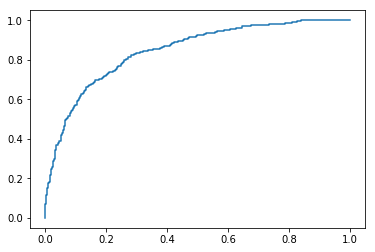

In [104]:
plt.plot(np.array(fpr_df),np.array(tpr_df))

# Self Defined

Simply compare the popularity of origin test set with results we get from prediction of classifiers.

In [180]:
lnth = len(test_wtpopl)
print(lnth)

1596


In [181]:
count1 = 0
count2 = 0
count3 = 0
count4 = 0
count5 = 0
count6 = 0
count7 = 0

for index, row in test_wtpopl.iterrows():
    popl = row['popularity']
    reslt1 = row["KNeigh"]
    reslt2 = row["NBGaus"]
    reslt3 = row["NBGaus_pf"]
    reslt4 = row["MLP"]
    reslt5 = row["EnsmblHD"]
    reslt6 = row["EnsmblSF"]
    reslt7 = row["EnsmblSW"]
    
    if popl==reslt1:
        count1 = count1 + 1
    if popl==reslt2:
        count2 = count2 + 1
    if popl==reslt3:
        count3 = count3 + 1
    if popl==reslt4:
        count4 = count4 + 1
    if popl==reslt5:
        count5 = count5 + 1
    if popl==reslt6:
        count6 = count6 + 1
    if popl==reslt7:
        count7 = count7 + 1
        
corctns1 = count1/lnth
corctns2 = count2/lnth
corctns3 = count3/lnth
corctns4 = count4/lnth
corctns5 = count5/lnth
corctns6 = count6/lnth
corctns7 = count7/lnth

print("KNeighboyhood: ", corctns1)
print("Naive_bayes.GaussianNB: ", corctns2)
print("Naive_bayes.GaussianNB (partial fit): ", corctns3)
print("MLPClassifier: ", corctns4)
print("Ensemble HD Voting: ", corctns5)
print("Ensemble SF Voting: ", corctns6)
print("Ensemble Pro: ", corctns7)

KNeighboyhood:  0.7224310776942355
Naive_bayes.GaussianNB:  0.7431077694235589
Naive_bayes.GaussianNB (partial fit):  0.7431077694235589
MLPClassifier:  0.775062656641604
Ensemble HD Voting:  0.7487468671679198
Ensemble SF Voting:  0.7675438596491229
Ensemble Pro:  0.7600250626566416


In [182]:
# Export the result of certain round classification as backup, specify the version
test_wtpopl.to_csv('chp5_classifiers/version_X/result_vrs0.1.csv', index=False) # change to result_vrsX.csv